In [56]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, TensorDataset
from load_mnist import load_mnist
import numpy as np
import matplotlib.pyplot as plt
from utils import plot_learning_curves
np.random.seed(0)

# Assignment 1.1

## Data ingestion

In [ ]:
# Load MNIST dataset
X_train, Y_train, X_test, Y_test = load_mnist()

## Training and evaluating network

In [68]:
def train_neural_network(
    model: nn.Module,
    criterion: nn.Module,
    optimizer: torch.optim.Optimizer,
    train_loader: DataLoader,
    test_loader: DataLoader,
    num_epochs: int
    ) -> None:
    """Train a neural network model and evaluate it on a test set.

    Args:
        model (nn.Module): Model to train
        criterion (nn.Module): Loss function
        optimizer (torch.optim.Optimizer): Optimizer
        train_loader (DataLoader): Training data loader
        test_loader (DataLoader): Test data loader
        num_epochs (int): Number of epochs
    """
    train_costs = []
    train_accuracies = []
    test_costs = []
    test_accuracies = []
    
    for epoch in range(num_epochs):
        model.train()
        train_loss = 0.0
        correct_train = 0
        total_train = 0
        
        # Training loop
        for i, (images, labels) in enumerate(train_loader):
            # Forward pass
            outputs = model(images)
            loss = criterion(outputs, torch.argmax(labels, dim=1))
            train_loss += loss.item()
            
            # Backward and optimize
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            _, predicted = torch.max(outputs.data, 1)
            total_train += labels.size(0)
            correct_train += (predicted == torch.argmax(labels, dim=1)).sum().item()
            
            if (i+1) % 100 == 0:
                print(f'Epoch {epoch+1}/{num_epochs}, Step {i+1}/{len(train_loader)}, Loss: {loss.item():.4f}')
        
        train_costs.append(train_loss / len(train_loader))
        train_accuracies.append(100*(correct_train / total_train))
        
        model.eval()
        test_loss = 0.0
        correct_test = 0
        total_test = 0
        
        # Validation loop
        with torch.no_grad():
            for images, labels in test_loader:
                outputs = model(images)
                loss = criterion(outputs, torch.argmax(labels, dim=1))
                test_loss += loss.item()
                _, predicted = torch.max(outputs.data, 1)
                total_test += labels.size(0)
                correct_test += (predicted == torch.argmax(labels, dim=1)).sum().item()
        
        test_costs.append(test_loss / len(test_loader))
        test_accuracies.append(100*(correct_test / total_test))
        
        print(f'Epoch {epoch+1}/{num_epochs}, Train Loss: {train_costs[-1]:.4f}, Train Accuracy: {train_accuracies[-1]:.2f}%, Test Loss: {test_costs[-1]:.4f}, Test Accuracy: {test_accuracies[-1]:.2f}%')
    
    plot_learning_curves(num_epochs, train_costs, test_costs, train_accuracies, test_accuracies)
        

In [70]:
# Hyperparameters
input_size = 784  # 28x28 images
hidden_size_1 = 256
hidden_size_2 = 128
num_classes = 10
num_epochs = 100
batch_size = 32
learning_rate = 0.001

In [59]:


# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
Y_train_tensor = torch.tensor(Y_train, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
Y_test_tensor = torch.tensor(Y_test, dtype=torch.long)

# Create data loaders
train_dataset = TensorDataset(X_train_tensor, Y_train_tensor)
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)

test_dataset = TensorDataset(X_test_tensor, Y_test_tensor)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

In [60]:
# Define the neural network model
class NeuralNet(nn.Module):
    def __init__(self, input_size: int, hidden_size_1: int, hidden_size_2: int, num_classes: int):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size_1)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size_1, hidden_size_2)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(hidden_size_2, num_classes)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu1(out)
        out = self.fc2(out)
        out = self.relu2(out)
        out = self.fc3(out)
        return out
    
# Initialize the model
model = NeuralNet(input_size, hidden_size_1, hidden_size_2, num_classes)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

Epoch 1/100, Step 100/469, Loss: 0.0041
Epoch 1/100, Step 200/469, Loss: 0.0005
Epoch 1/100, Step 300/469, Loss: 0.0089
Epoch 1/100, Step 400/469, Loss: 0.0334
Epoch 1/100, Train Loss: 0.0269, Train Accuracy: 99.26%, Test Loss: 0.1183, Test Accuracy: 97.61%
Epoch 2/100, Step 100/469, Loss: 0.0048
Epoch 2/100, Step 200/469, Loss: 0.1444
Epoch 2/100, Step 300/469, Loss: 0.0086
Epoch 2/100, Step 400/469, Loss: 0.0015
Epoch 2/100, Train Loss: 0.0277, Train Accuracy: 99.21%, Test Loss: 0.1224, Test Accuracy: 97.62%
Epoch 3/100, Step 100/469, Loss: 0.0078
Epoch 3/100, Step 200/469, Loss: 0.0062
Epoch 3/100, Step 300/469, Loss: 0.0471
Epoch 3/100, Step 400/469, Loss: 0.0158
Epoch 3/100, Train Loss: 0.0288, Train Accuracy: 99.19%, Test Loss: 0.1480, Test Accuracy: 97.52%
Epoch 4/100, Step 100/469, Loss: 0.0844
Epoch 4/100, Step 200/469, Loss: 0.0086
Epoch 4/100, Step 300/469, Loss: 0.0107
Epoch 4/100, Step 400/469, Loss: 0.0028
Epoch 4/100, Train Loss: 0.0239, Train Accuracy: 99.33%, Test Loss

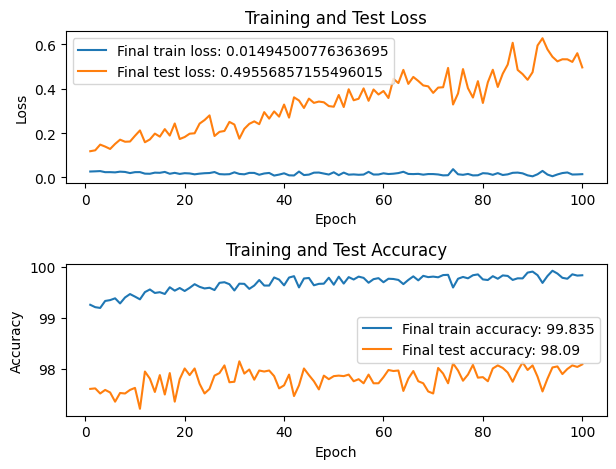

In [71]:
train_neural_network(model, criterion, optimizer, train_loader, test_loader, num_epochs)

In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
from sklearn.model_selection import train_test_split

# Hyperparameters
input_size = 784  # 28x28 images
hidden_size = 500
num_classes = 10
num_epochs = 5
batch_size = 100
learning_rate = 0.001

# Load MNIST dataset
X_train, Y_train, X_test, Y_test = load_mnist()

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
Y_train_tensor = torch.tensor(Y_train, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
Y_test_tensor = torch.tensor(Y_test, dtype=torch.long)

# Create data loaders
train_dataset = TensorDataset(X_train_tensor, Y_train_tensor)
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)

test_dataset = TensorDataset(X_test_tensor, Y_test_tensor)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

# Define the neural network model
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

# Initialize the model
model = NeuralNet(input_size, hidden_size, num_classes)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Training loop
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, torch.argmax(labels, dim=1))

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 100 == 0:
            print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, i+1, total_step, loss.item()))

# Test the model
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == torch.argmax(labels, dim=1)).sum().item()

    print('Accuracy of the network on the 10000 test images: {} %'.format(100 * correct / total))


Epoch [1/5], Step [100/600], Loss: 0.2802
Epoch [1/5], Step [200/600], Loss: 0.2113
Epoch [1/5], Step [300/600], Loss: 0.3222
Epoch [1/5], Step [400/600], Loss: 0.1806
Epoch [1/5], Step [500/600], Loss: 0.1854
Epoch [1/5], Step [600/600], Loss: 0.2153
Epoch [2/5], Step [100/600], Loss: 0.0739
Epoch [2/5], Step [200/600], Loss: 0.1606
Epoch [2/5], Step [300/600], Loss: 0.0723
Epoch [2/5], Step [400/600], Loss: 0.0458
Epoch [2/5], Step [500/600], Loss: 0.1203
Epoch [2/5], Step [600/600], Loss: 0.0722
Epoch [3/5], Step [100/600], Loss: 0.0773
Epoch [3/5], Step [200/600], Loss: 0.0307
Epoch [3/5], Step [300/600], Loss: 0.1454
Epoch [3/5], Step [400/600], Loss: 0.0532
Epoch [3/5], Step [500/600], Loss: 0.0760
Epoch [3/5], Step [600/600], Loss: 0.0214
Epoch [4/5], Step [100/600], Loss: 0.0577
Epoch [4/5], Step [200/600], Loss: 0.0188
Epoch [4/5], Step [300/600], Loss: 0.0695
Epoch [4/5], Step [400/600], Loss: 0.0506
Epoch [4/5], Step [500/600], Loss: 0.0262
Epoch [4/5], Step [600/600], Loss: